In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.utils import load_meta_log


import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from utils.visualize_experiments import (plot_roi_subject_grid, plot_average_scores, get_norm_score,
                                         plot_bo_scores, plot_perf_per_layer, plot_best_layer,
                                         plot_combined_scores)

In [66]:
num_bo_iters = 25
num_layers = 5

In [151]:
#experiment_dir = "../experiments/roi/elastic_resnet50_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnet50_bo_15"

#experiment_dir = "../experiments/roi/elastic_efficientnet_b3_bo_50"
#experiment_dir = "../experiments/wb/elastic_efficientnet_b3_bo_50"

#experiment_dir = "../experiments/roi/elastic_resnext50_32x4d_bo_50"
#experiment_dir = "../experiments/wb/elastic_resnext50_32x4d_bo_50"

#experiment_dir = "../data/experiments/roi/mlp_efficientnet_b3_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"
#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_bo_50"
#experiment_dir = "../data/experiments/wb/mlp_efficientnet_b3_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_vone_resnet50_at_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_vone_resnet50_at_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_vone_cornets_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_vone_cornets_bo_30"

#experiment_dir = "../data/experiments/roi/elastic_250_efficientnet_b3_b50"
#experiment_dir = "../data/experiments/wb/elastic_250_efficientnet_b3_b30"

#experiment_dir = "../data/experiments/roi/elastic_250_vgg_bo_50"
#experiment_dir = "../data/experiments/wb/elastic_250_efficientnet_b3_b30"
experiment_dir = "../data/experiments/roi/pls_50_resnet50_bo_25"

meta_log, hyper_log = load_result_logs(experiment_dir)

In [152]:
hyper_log.best_bo_score.mean()

0.24643750737110773

# Bayesian Optimization Procedure Across Network Feature Layers

../utils/visualize_experiments.py:84: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eval_id = hyper_log.hyper_log[hyper_log.hyper_log.subject_id == subject_id][hyper_log.hyper_log.roi_type == roi_type].run_id.iloc[0]


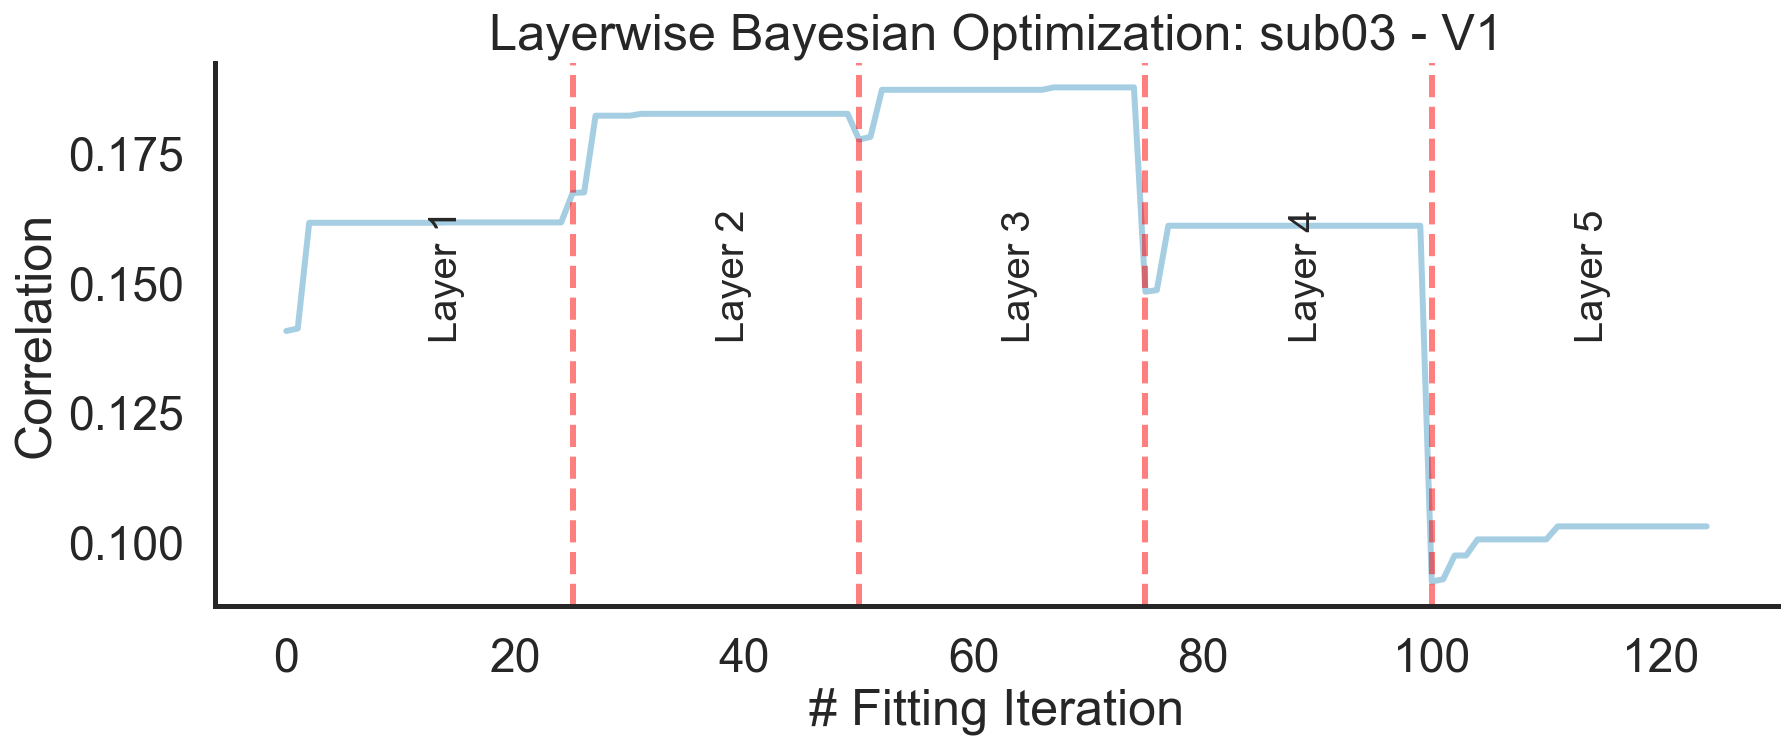

In [153]:
plot_bo_scores(meta_log, hyper_log, subject_id="sub03", roi_type="V1", num_bo_per_layer=num_bo_iters, num_layers=num_layers)

# Performance Across Subjects and ROIs

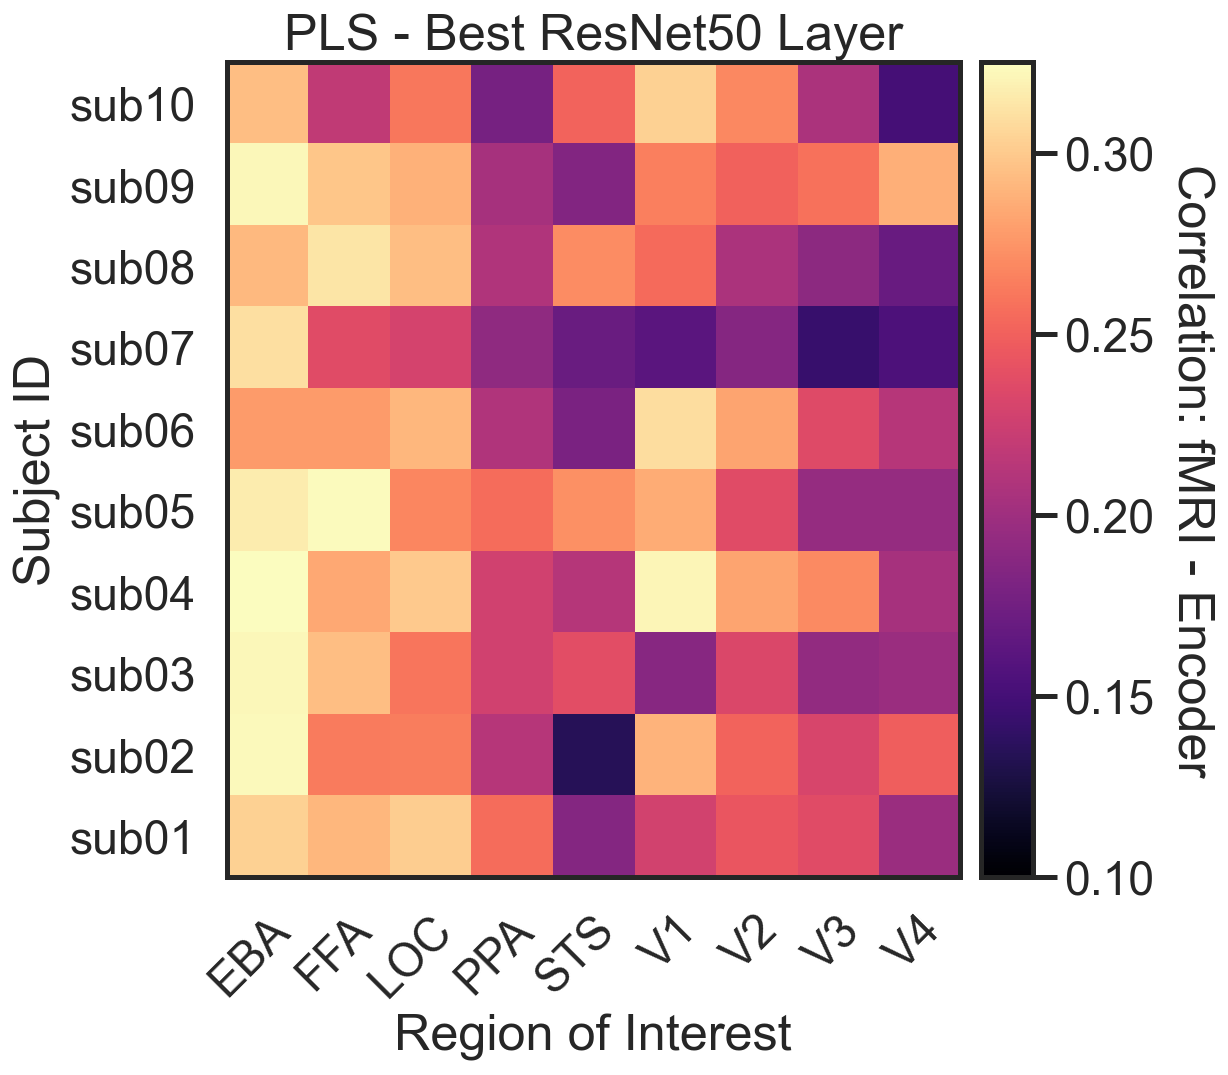

In [161]:
plot_roi_subject_grid(hyper_log, title="PLS - Best ResNet50 Layer")

[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]


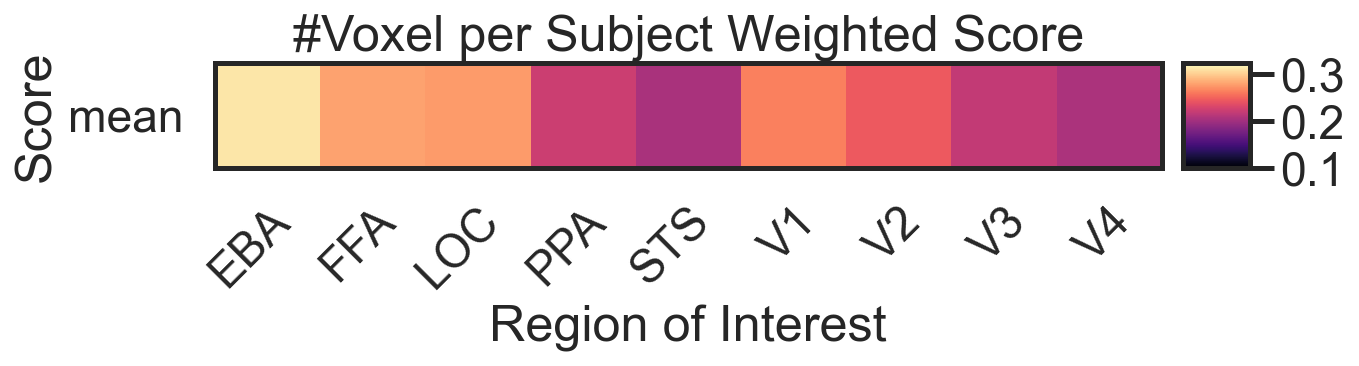

In [165]:
get_norm_score(hyper_log, plot=True)

# Performance Per Layer

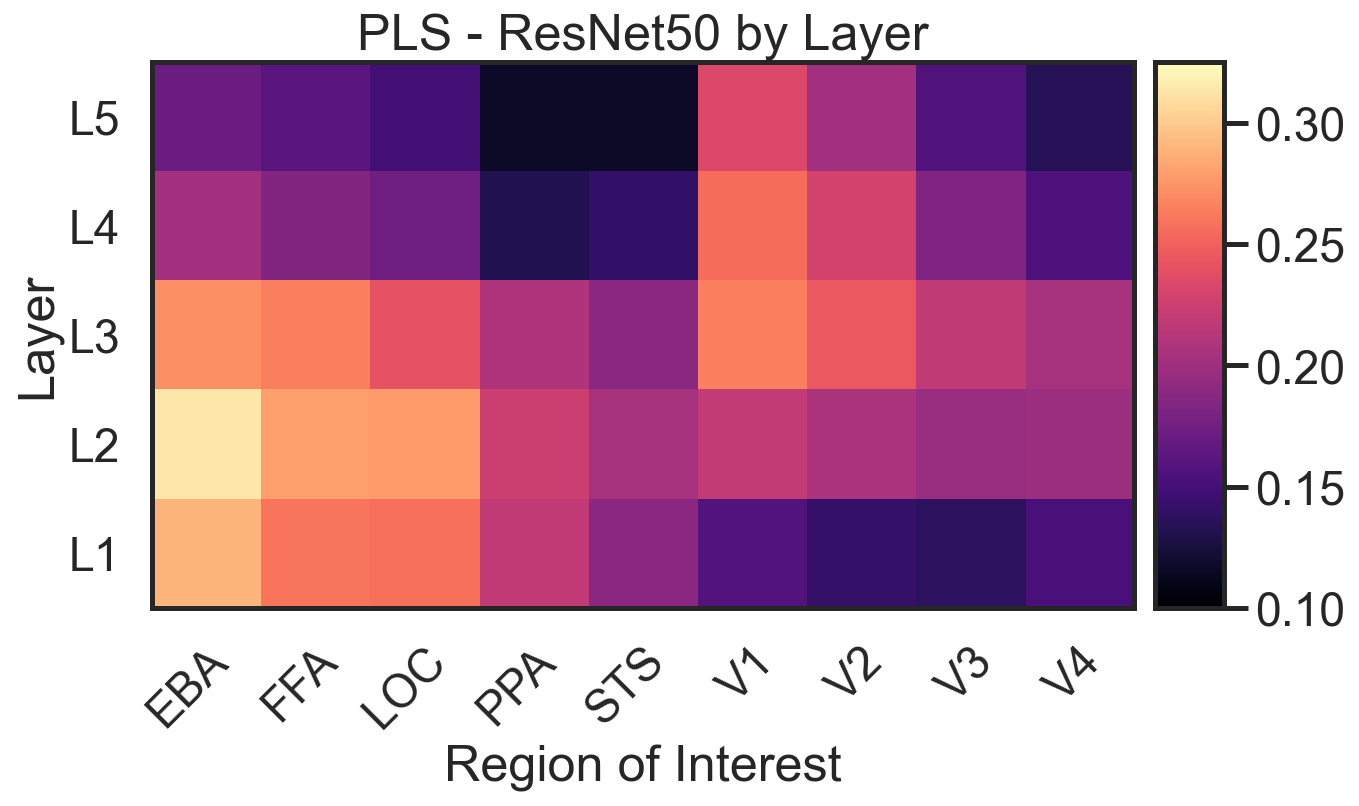

In [163]:
plot_perf_per_layer(hyper_log, meta_log, num_bo_per_layer=25, num_layers=5, title="PLS - ResNet50 by Layer")

# Feature Compression Comparison

In [7]:
meta_log_25, hyper_log_25 = load_result_logs("../data/experiments/roi/pls_25_resnet50_bo_25")
meta_log_50, hyper_log_50 = load_result_logs("../data/experiments/roi/pls_50_resnet50_bo_25")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_resnet50_bo_25")
meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_500_resnet50_bo_25")

pca_25 = get_norm_score(hyper_log_25)
pca_50 = get_norm_score(hyper_log_50)
pca_100 = get_norm_score(hyper_log_100)
pca_250 = get_norm_score(hyper_log_250)
pca_500 = get_norm_score(hyper_log_500)

print(30*"=")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_umap_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_umap_250_resnet50_bo_25")
meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_umap_500_resnet50_bo_25")

umap_100 = get_norm_score(hyper_log_100)
umap_250 = get_norm_score(hyper_log_250)
umap_500 = get_norm_score(hyper_log_500)

print(30*"=")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_mds_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_mds_250_resnet50_bo_25")
#meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_mds_500_resnet50_bo_25")

mds_100 = get_norm_score(hyper_log_100)
mds_250 = get_norm_score(hyper_log_250)
#md_500 = get_norm_score(hyper_log_500)

print(30*"=")
meta_log_100, hyper_log_100 = load_result_logs("../data/experiments/roi/pls_autoencoder_100_resnet50_bo_25")
meta_log_250, hyper_log_250 = load_result_logs("../data/experiments/roi/pls_autoencoder_250_resnet50_bo_25")
meta_log_500, hyper_log_500 = load_result_logs("../data/experiments/roi/pls_autoencoder_500_resnet50_bo_25")

autoencoder_100 = get_norm_score(hyper_log_100)
autoencoder_250 = get_norm_score(hyper_log_250)
autoencoder_500 = get_norm_score(hyper_log_500)

[0.307903   0.28468891 0.26998135 0.22644033 0.21348233 0.26529316
 0.24517089 0.22034619 0.21140307]
[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]
[0.29168156 0.26750864 0.25897558 0.21219818 0.18910294 0.24932589
 0.22919047 0.20299109 0.19224165]
[0.25309885 0.22247129 0.21819858 0.1713832  0.15657363 0.21602509
 0.19165082 0.16507434 0.15386375]
[0.19635673 0.1679079  0.1639535  0.13051743 0.12307389 0.16761006
 0.14921781 0.12945747 0.11813488]
[0.26471349 0.2353638  0.22609176 0.18794981 0.17798964 0.16396058
 0.1480894  0.13918291 0.15552227]
[0.26897812 0.24311549 0.23073348 0.18736747 0.17918299 0.16261722
 0.14726284 0.138182   0.15486723]
[0.26298456 0.23517291 0.22807638 0.19153996 0.17942529 0.16003675
 0.14693536 0.13828079 0.1531066 ]
[0.29952329 0.27591996 0.26416914 0.22242197 0.20142527 0.24590016
 0.22441168 0.19981138 0.19579248]
[0.28335    0.26692118 0.2468468  0.22100971 0.20059742 0.22277851
 0.20441429 0.1

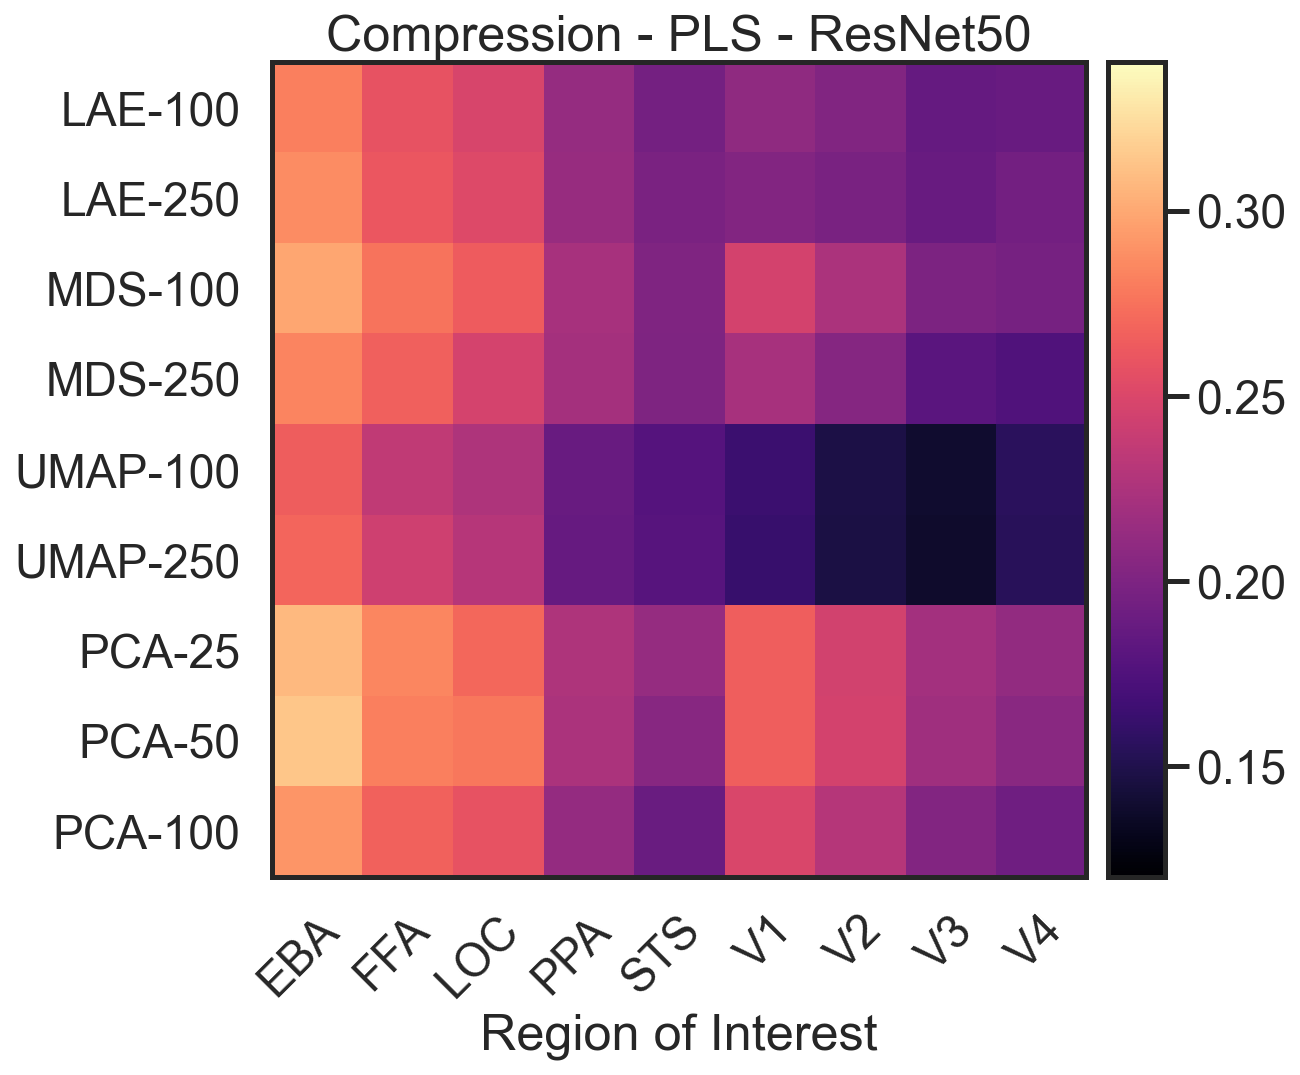

In [38]:
scores = [autoencoder_100, autoencoder_250,
          mds_100, mds_250,
          umap_100, umap_250,
          pca_25, pca_50, pca_100]
range_y = ['LAE-100', "LAE-250",
           "MDS-100", "MDS-250",
           "UMAP-100", "UMAP-250",
           "PCA-25", "PCA-50", "PCA-100"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Compression - PLS - ResNet50"
ylabel = None #"Compression Technique"
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.12, max_heat=0.34)

# Architecture Comparison

In [19]:
meta_log_alex, hyper_log_alex = load_result_logs("../data/experiments/roi/pls_pca_50_alexnet_bo_25")
meta_log_vgg, hyper_log_vgg = load_result_logs("../data/experiments/roi/pls_pca_50_vgg_bo_25")
meta_log_r18, hyper_log_r18 = load_result_logs("../data/experiments/roi/pls_pca_50_resnet18_bo_25")
meta_log_r34, hyper_log_r34 = load_result_logs("../data/experiments/roi/pls_pca_50_resnet34_bo_25")
meta_log_r50, hyper_log_r50 = load_result_logs("../data/experiments/roi/pls_50_resnet50_bo_25")
meta_log_r101, hyper_log_r101 = load_result_logs("../data/experiments/roi/pls_pca_50_resnet101_bo_25")
meta_log_r152, hyper_log_r152 = load_result_logs("../data/experiments/roi/pls_pca_50_resnet152_bo_25")
meta_log_eff, hyper_log_eff = load_result_logs("../data/experiments/roi/pls_pca_50_efficientnet_b3_bo_25")
meta_log_rnext, hyper_log_rnext = load_result_logs("../data/experiments/roi/pls_pca_50_resnext50_32x4d_bo_25")


alexnet = get_norm_score(hyper_log_alex)
vgg = get_norm_score(hyper_log_vgg)
r18 = get_norm_score(hyper_log_r18)
r34 = get_norm_score(hyper_log_r34)
r50 = get_norm_score(hyper_log_r50)
r101 = get_norm_score(hyper_log_r101)
r152 = get_norm_score(hyper_log_r152)
enet = get_norm_score(hyper_log_eff)
rnext = get_norm_score(hyper_log_rnext)

[0.24347787 0.2323322  0.20817858 0.18669157 0.16826598 0.25391336
 0.23107834 0.19710531 0.17984942]
[0.28215898 0.27453873 0.25133752 0.21333941 0.19675727 0.25884874
 0.23123511 0.2011125  0.19974308]
[0.30545255 0.27638826 0.26793994 0.22015976 0.20053831 0.26486927
 0.24604105 0.2133293  0.20177124]
[0.30486682 0.27694118 0.26739997 0.21567386 0.2044148  0.26316527
 0.24018381 0.21520824 0.2101013 ]
[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]
[0.31826451 0.2901165  0.28246841 0.22356755 0.20783729 0.26247929
 0.24503237 0.22306064 0.21785743]
[0.32107895 0.28903805 0.28546106 0.23088904 0.20924135 0.26263354
 0.24216889 0.22214829 0.21977448]
[0.31681485 0.29155317 0.27738277 0.23063475 0.20876    0.2640303
 0.24229422 0.21505661 0.20600745]
[0.31655527 0.29006736 0.27762265 0.23187381 0.20808929 0.26448094
 0.24275767 0.21623666 0.20641055]


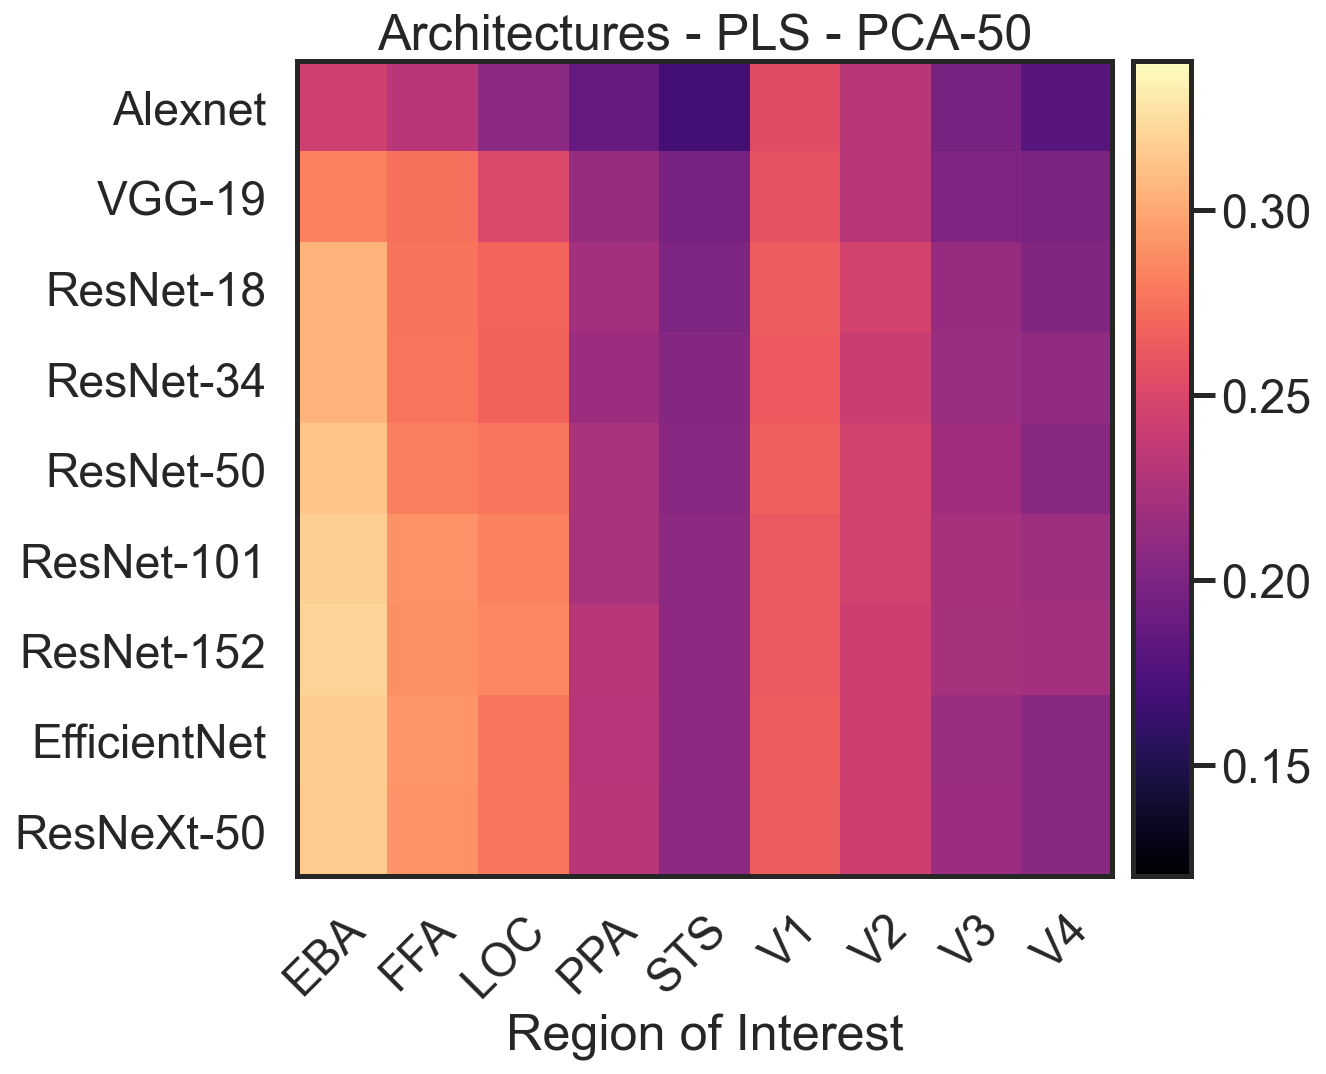

In [31]:
scores = [alexnet, vgg,
          r18, r34, r50, r101, r152,
          enet, rnext]
range_y = ['Alexnet', "VGG-19",
           "ResNet-18", "ResNet-34",
           "ResNet-50", "ResNet-101", "ResNet-152",
           "EfficientNet", "ResNeXt-50"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Architectures - PLS - PCA-50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.12, max_heat=0.34)

# Encoding Model Comparison

In [33]:
meta_log_ols, hyper_log_ols = load_result_logs("../data/experiments/roi/ols_pca_50_resnet50_bo_25")
meta_log_elastic, hyper_log_elastic = load_result_logs("../data/experiments/roi/elastic_pca_50_resnet50_bo_25")
meta_log_mlp, hyper_log_mlp = load_result_logs("../data/experiments/roi/mlp_pca_50_resnet50_bo_25")
meta_log_pls, hyper_log_pls = load_result_logs("../data/experiments/roi/pls_50_resnet50_bo_25")
meta_log_cca, hyper_log_cca = load_result_logs("../data/experiments/roi/cca_pca_50_resnet50_bo_25")
meta_log_cpls, hyper_log_cpls = load_result_logs("../data/experiments/roi/cpls_pca_50_resnet50_bo_25")


ols = get_norm_score(hyper_log_ols)
elastic = get_norm_score(hyper_log_elastic)
mlp = get_norm_score(hyper_log_mlp)
pls = get_norm_score(hyper_log_pls)
cca = get_norm_score(hyper_log_cca)
cpls = get_norm_score(hyper_log_cpls)


[0.29721383 0.25866887 0.26090753 0.19960742 0.18182458 0.25201455
 0.23408128 0.20724045 0.19480209]
[0.3069265  0.27013589 0.26774603 0.21222768 0.19890813 0.26303164
 0.24344948 0.21558435 0.20250735]
[0.309859   0.27636143 0.27287706 0.21639313 0.19969934 0.26249247
 0.24512933 0.21512555 0.20709605]
[0.31392331 0.281409   0.27803447 0.22454439 0.20579314 0.26559641
 0.24598237 0.2187759  0.20665525]
[0.28746874 0.26776764 0.25158812 0.20837266 0.2017895  0.24885081
 0.22594655 0.20345927 0.19447904]
[0.26657561 0.24776754 0.2310333  0.195311   0.17902536 0.22444265
 0.20988721 0.18599308 0.17970914]


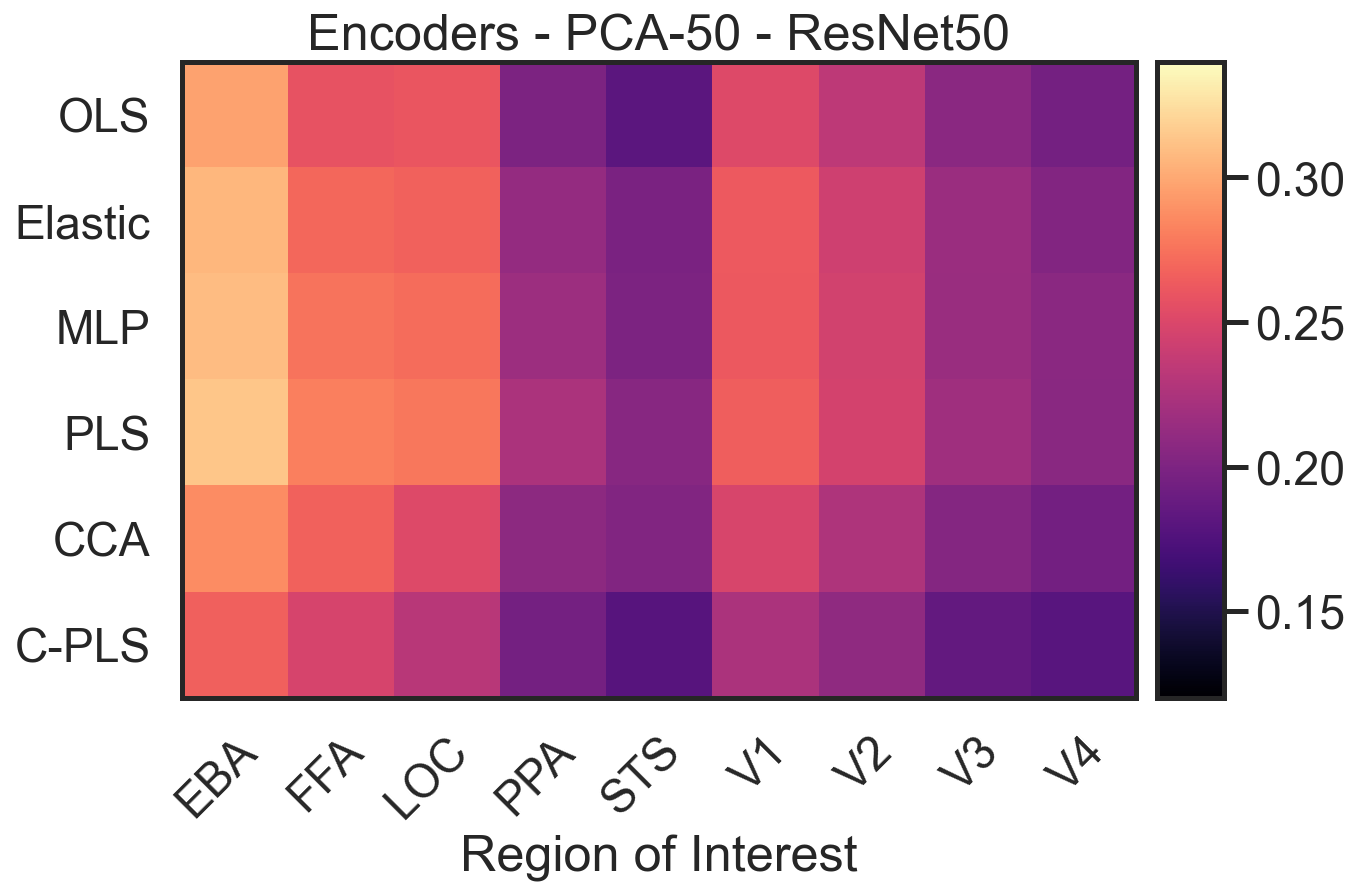

In [37]:
scores = [ols, elastic, mlp, pls, cca, cpls]
range_y = ['OLS', "Elastic", "MLP", "PLS", "CCA", "C-PLS"][::-1]
range_x = ["EBA", "FFA", "LOC", "PPA", "STS", "V1", "V2", "V3", "V4"] 
title = "Encoders - PCA-50 - ResNet50"
ylabel = None
plot_combined_scores(scores, range_x, range_y, title, ylabel,
                     min_heat=0.12, max_heat=0.34)

# Best Layer Per ROI/Subject

In [ ]:
plot_best_layer(hyper_log, meta_log, num_layers=5,
                num_bo_per_layer=50,
                title="Best Resnext50 Layer per Subject/ROI:")

# ImageNet Validation Scores

(0.55, 0.81)

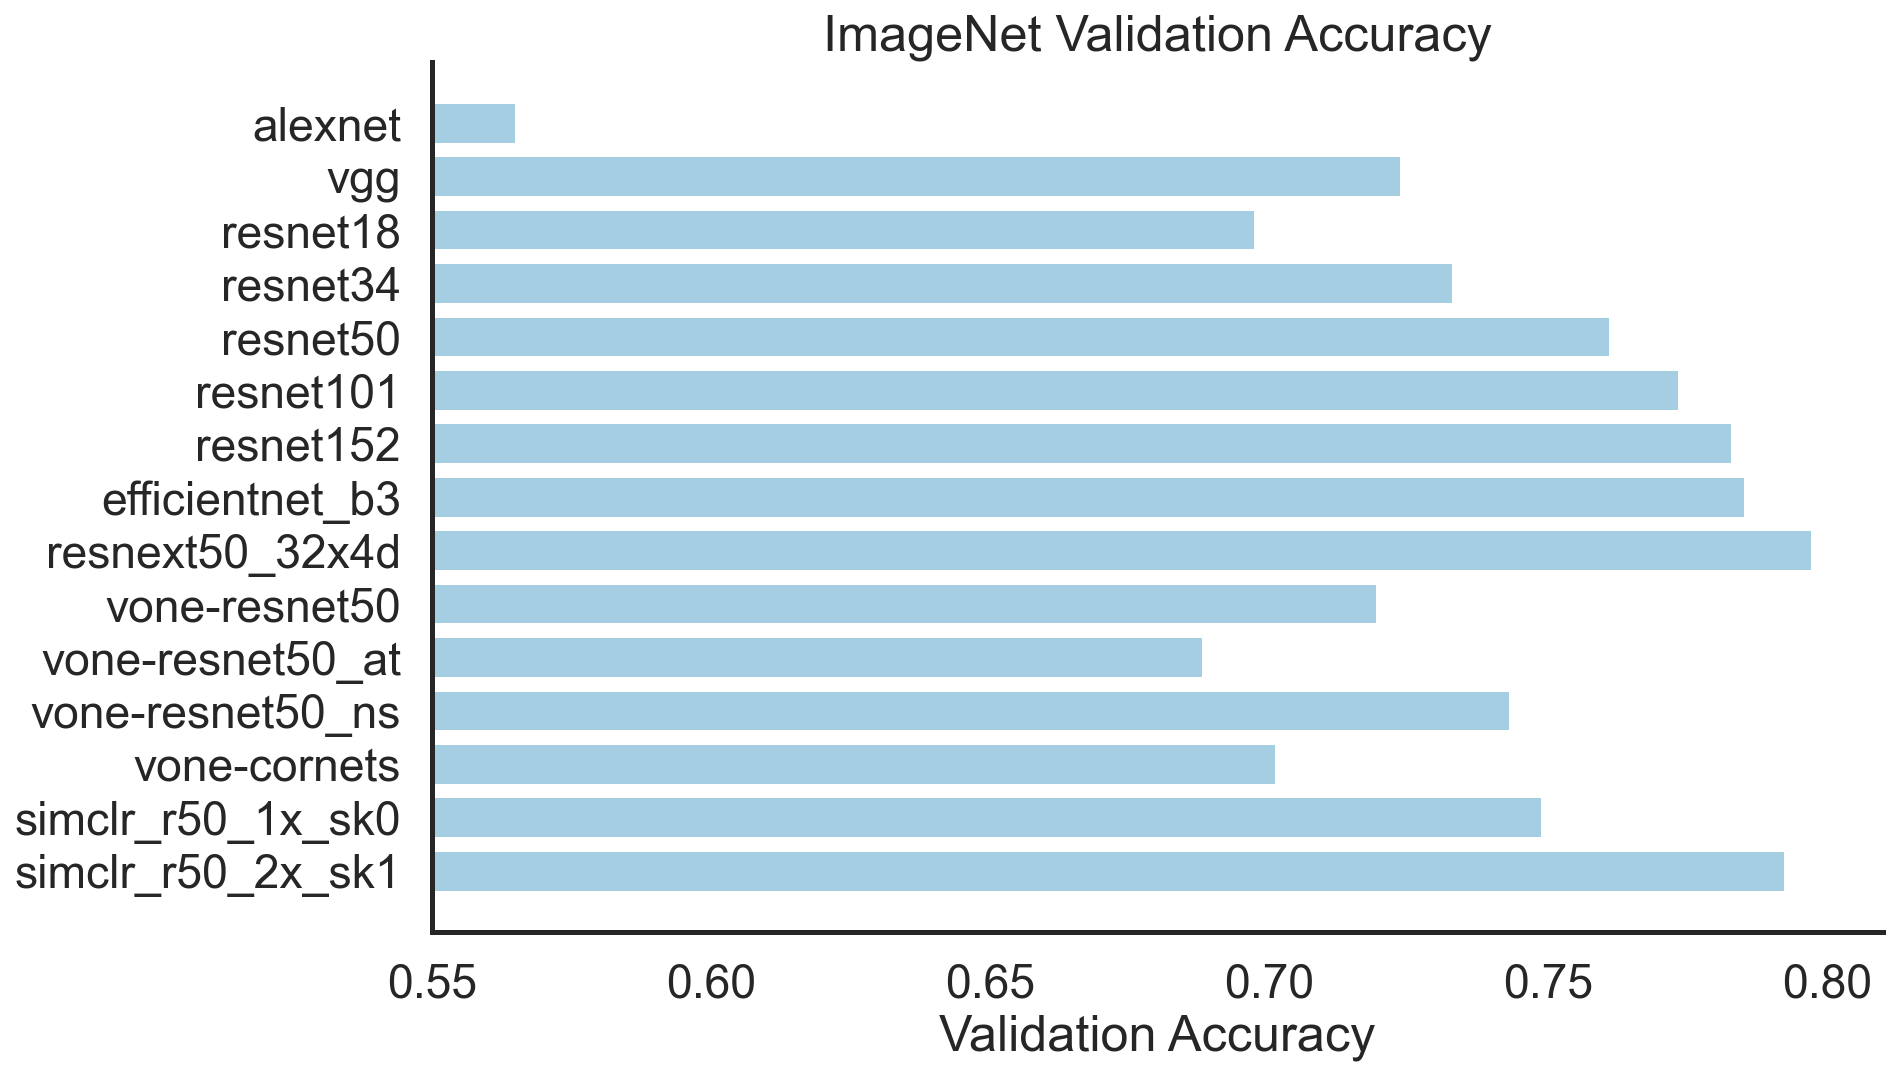

In [213]:
import pandas as pd

df = pd.read_csv("../data/imagenet_val_scores.csv", index_col=0)
x_labels = df['model_type'].tolist()[::-1]

fig, ax = plt.subplots(figsize=(13,8))
ax.barh(np.arange(df.shape[0]), df["top1"][::-1])
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(x_labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Validation Accuracy")
ax.set_title("ImageNet Validation Accuracy")
ax.set_xlim(0.55, 0.81)

['alexnet',
 'vgg',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'efficientnet_b3',
 'resnext50_32x4d',
 'vone-resnet50',
 'vone-resnet50_at',
 'vone-resnet50_ns',
 'vone-cornets',
 'simclr_r50_1x_sk0_100pct',
 'simclr_r50_2x_sk1_100pct']